In [3]:
import os 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

In [108]:
file_ext = 'pdf'

In [10]:
pct_err = pd.read_csv(filepath_or_buffer= os.getcwd() + "/ch_pct_err.csv", header= None, index_col= None, names= ["Channel", "Error"])
pct_err = pct_err.to_numpy()

freqs = np.arange(191.6, 195.9, 0.1).tolist()

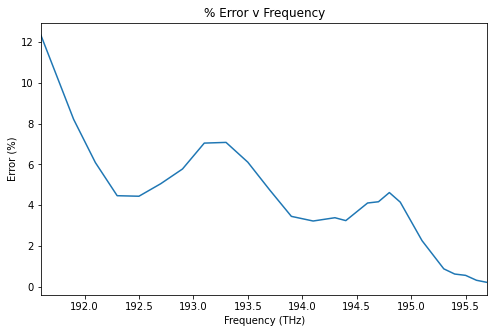

In [110]:
freq = np.array([np.round(freqs[int(i)], 2)  for i in pct_err[:,0]])
fig1, ax1 = plt.subplots(1, figsize = (8,5))
ax1.plot(freq, pct_err[:,1])
#ax1.set_ylim([0, 450])

ax1.set_xlabel('Frequency (THz)')
ax1.set_ylabel('Error (%)')
ax1.set_title('% Error v Frequency')
ax1.set_xlim([freq[0], freq[-1]])

fig1.savefig('{0}.{1}'.format('pct_err_freq',file_ext))


In [101]:
[freq[1], freq[-1]]

[191.9, 195.7]

In [87]:
ch_names = np.arange(44).tolist()
freqs = np.arange(191.6, 195.9, 0.1).tolist()
for x in range(len(ch_names)):
  ch_names[x] = "Ch %.0f (%.1f)" % (ch_names[x], freqs[x])

In [93]:
[ch_names[int(i)]  for i in pct_err[:,0]]

array(['Ch 0 (191.6)', 'Ch 3 (191.9)', 'Ch 5 (192.1)', 'Ch 7 (192.3)',
       'Ch 9 (192.5)', 'Ch 11 (192.7)', 'Ch 13 (192.9)', 'Ch 15 (193.1)',
       'Ch 17 (193.3)', 'Ch 19 (193.5)', 'Ch 21 (193.7)', 'Ch 23 (193.9)',
       'Ch 25 (194.1)', 'Ch 27 (194.3)', 'Ch 28 (194.4)', 'Ch 30 (194.6)',
       'Ch 31 (194.7)', 'Ch 32 (194.8)', 'Ch 33 (194.9)', 'Ch 35 (195.1)',
       'Ch 37 (195.3)', 'Ch 38 (195.4)', 'Ch 39 (195.5)', 'Ch 40 (195.6)',
       'Ch 41 (195.7)'], dtype='<U13')

In [78]:
type(a)

type

In [42]:
for i in freqs[:]:
    print(np.round(i, 2))
    

191.6
191.7
191.8
191.9
192.0
192.1
192.2
192.3
192.4
192.5
192.6
192.7
192.8
192.9
193.0
193.1
193.2
193.3
193.4
193.5
193.6
193.7
193.8
193.9
194.0
194.1
194.2
194.3
194.4
194.5
194.6
194.7
194.8
194.9
195.0
195.1
195.2
195.3
195.4
195.5
195.6
195.7
195.8
195.9


In [57]:
arr = np.array([np.round(freqs[int(i)], 2)  for i in pct_err[:,0]])

In [56]:
[int(i) for i in pct_err[:,0]]

[0, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 28, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41]


In [58]:
arr

array([191.6, 191.9, 192.1, 192.3, 192.5, 192.7, 192.9, 193.1, 193.3,
       193.5, 193.7, 193.9, 194.1, 194.3, 194.4, 194.6, 194.7, 194.8,
       194.9, 195.1, 195.3, 195.4, 195.5, 195.6, 195.7])

In [65]:
a = type(np.array([np.round(freqs[int(i)], 2)  for i in pct_err[:,0]]))

numpy.ndarray

In [64]:
type(pct_err[:,1])

numpy.ndarray